In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import  train_test_split

import sys
path_append = "../"
sys.path.append(path_append)  # Go up one directory from where you are.

from ccnets.config import get_parser
from ccnets.ccnets import CCNets
from ccnets.resnets import ResNets
from nn.custom_deepfm import DeepFM
from nn.custom_dnn import ResMLP, MLP 
from ccnets.utils.log import create_log_details, create_log_name
from ccnets.utils.setting import set_random_seed
import torch
import os
from torch.utils.tensorboard import SummaryWriter


In [2]:
df = pd.read_csv('./data/global_data_on_sustainable_energy.csv')
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3649.0,2.010038e+03,6.054228e+00,2000.000000,2005.000000,2.010000e+03,2.015000e+03,2.020000e+03
Access to electricity (% of population),3639.0,7.893370e+01,3.027554e+01,1.252269,59.800890,9.836157e+01,1.000000e+02,1.000000e+02
Access to clean fuels for cooking,3480.0,6.325529e+01,3.904366e+01,0.000000,23.175000,8.315000e+01,1.000000e+02,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2718.0,1.131375e+02,2.441673e+02,0.000000,3.540000,3.291000e+01,1.122100e+02,3.060190e+03
Financial flows to developing countries (US $),1560.0,9.422400e+07,2.981544e+08,0.000000,260000.000000,5.665000e+06,5.534750e+07,5.202310e+09
Renewable energy share in the total final energy consumption (%),3455.0,3.263816e+01,2.989490e+01,0.000000,6.515000,2.330000e+01,5.524500e+01,9.604000e+01
Electricity from fossil fuels (TWh),3628.0,7.036500e+01,3.480519e+02,0.000000,0.290000,2.970000e+00,2.683750e+01,5.184130e+03
Electricity from nuclear (TWh),3523.0,1.345019e+01,7.300662e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,8.094100e+02
Electricity from renewables (TWh),3628.0,2.396801e+01,1.044311e+02,0.000000,0.040000,1.470000e+00,9.600000e+00,2.184940e+03
Low-carbon electricity (% electricity),3607.0,3.680118e+01,3.431488e+01,0.000000,2.877847,2.786507e+01,6.440379e+01,1.000000e+02


In [5]:
df.shape

(3649, 21)

In [6]:
df.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [7]:
# target값에 대해 상관계수가 낮고 결측치가 너무 많아 컬럼 삭제

df.drop(columns = ['Renewables (% equivalent primary energy)', 'Financial flows to developing countries (US $)', 'Renewable-electricity-generating-capacity-per-capita'], axis =1, inplace = True)

In [8]:
df.columns = ['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'Density', 'Land Area(Km2)', 'Latitude', 'Longitude']

In [9]:
df['Density'] = df['Density'].str.replace(',', '').astype(float)

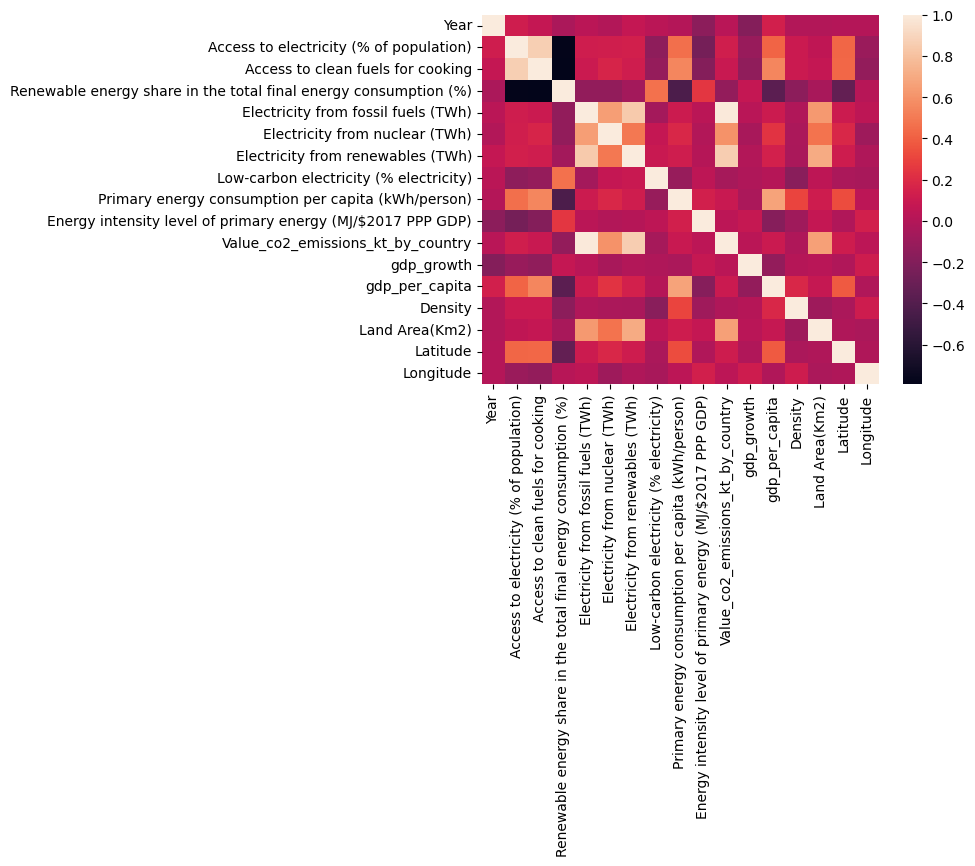

In [10]:
numerical_df = df.select_dtypes(include=[np.number])
sns.heatmap(numerical_df.corr())
plt.show()

In [11]:
df.fillna(0, axis=0, inplace=True)

In [12]:
df.shape

(3649, 18)

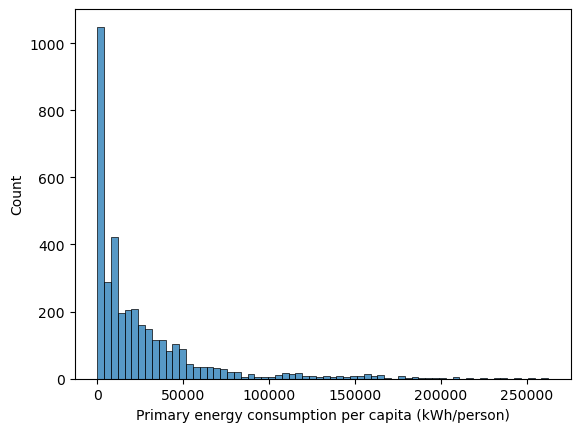

In [13]:
sns.histplot(df['Primary energy consumption per capita (kWh/person)'])
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3649 non-null   float64
 3   Access to clean fuels for cooking                                 3649 non-null   float64
 4   Renewable energy share in the total final energy consumption (%)  3649 non-null   float64
 5   Electricity from fossil fuels (TWh)                               3649 non-null   float64
 6   Electricity from nuclear (TWh)                                    3649 non-null   float64
 7   Electricity from renewables (TWh)

In [15]:
dumm_cols = ['Entity']
df =pd.get_dummies(data = df, columns = dumm_cols)
df.head()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),...,Entity_Ukraine,Entity_United Arab Emirates,Entity_United Kingdom,Entity_United States,Entity_Uruguay,Entity_Uzbekistan,Entity_Vanuatu,Entity_Yemen,Entity_Zambia,Entity_Zimbabwe
0,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,...,False,False,False,False,False,False,False,False,False,False
1,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,...,False,False,False,False,False,False,False,False,False,False
2,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,...,False,False,False,False,False,False,False,False,False,False
3,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,...,False,False,False,False,False,False,False,False,False,False
4,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,...,False,False,False,False,False,False,False,False,False,False


In [16]:
y = df[['Primary energy consumption per capita (kWh/person)']]
X = df.drop(['Primary energy consumption per capita (kWh/person)'],axis=1)

sc = RobustScaler()
X = sc.fit_transform(X)


X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,-1.0,-2.341442,-0.850703,0.504467,-0.105945,0.0,-0.116597,0.632967,-0.858131,-0.128650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.9,-2.281823,-0.838993,0.517141,-0.108613,0.0,-0.096639,0.936865,-0.823529,-0.129242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.8,-2.152589,-0.827283,0.355703,-0.107088,0.0,-0.090336,0.878856,-0.941176,-0.123323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.7,-2.023482,-0.812061,0.331394,-0.100229,0.0,-0.082983,0.650174,-0.941176,-0.119574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.6,-1.894445,-0.795667,0.488884,-0.099466,0.0,-0.090336,0.583858,-1.010381,-0.123323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,0.6,-1.349446,-0.574356,1.271348,0.021341,0.0,0.199580,0.353512,2.034602,0.073796,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3645,0.7,-1.310275,-0.574356,1.282984,0.004192,0.0,0.302521,0.512399,1.865052,0.060379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3646,0.8,-1.276504,-0.573185,1.236651,0.030107,0.0,0.424370,0.527102,1.975779,0.100631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3647,0.9,-1.247220,-0.570843,1.263038,0.027439,0.0,0.331933,0.465154,2.197232,0.088398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
sc = RobustScaler()

# Fit and transform the DataFrame
scaled_array = sc.fit_transform(y)

# Replace original DataFrame values with scaled values while keeping DataFrame format
y.loc[:, :] = scaled_array


C:\Users\jhp\AppData\Local\Temp\ipykernel_49644\1560937885.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[:, :] = scaled_array


In [18]:
y

,Primary energy consumption per capita (kWh/person)
0,-0.416492
1,-0.418627
2,-0.419473
3,-0.418852
4,-0.419688
...,...
3644,-0.321448
3645,-0.326636
3646,-0.314484
3647,-0.328727


In [19]:
X

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,-1.0,-2.341442,-0.850703,0.504467,-0.105945,0.0,-0.116597,0.632967,-0.858131,-0.128650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.9,-2.281823,-0.838993,0.517141,-0.108613,0.0,-0.096639,0.936865,-0.823529,-0.129242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.8,-2.152589,-0.827283,0.355703,-0.107088,0.0,-0.090336,0.878856,-0.941176,-0.123323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.7,-2.023482,-0.812061,0.331394,-0.100229,0.0,-0.082983,0.650174,-0.941176,-0.119574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.6,-1.894445,-0.795667,0.488884,-0.099466,0.0,-0.090336,0.583858,-1.010381,-0.123323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,0.6,-1.349446,-0.574356,1.271348,0.021341,0.0,0.199580,0.353512,2.034602,0.073796,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3645,0.7,-1.310275,-0.574356,1.282984,0.004192,0.0,0.302521,0.512399,1.865052,0.060379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3646,0.8,-1.276504,-0.573185,1.236651,0.030107,0.0,0.424370,0.527102,1.975779,0.100631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3647,0.9,-1.247220,-0.570843,1.263038,0.027439,0.0,0.331933,0.465154,2.197232,0.088398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
print(X.shape)
print(y.shape)
print(X.info())

(3649, 192)
(3649, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Columns: 192 entries, 0 to 191
dtypes: float64(192)
memory usage: 5.3 MB
None


In [21]:
X

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,-1.0,-2.341442,-0.850703,0.504467,-0.105945,0.0,-0.116597,0.632967,-0.858131,-0.128650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.9,-2.281823,-0.838993,0.517141,-0.108613,0.0,-0.096639,0.936865,-0.823529,-0.129242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.8,-2.152589,-0.827283,0.355703,-0.107088,0.0,-0.090336,0.878856,-0.941176,-0.123323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.7,-2.023482,-0.812061,0.331394,-0.100229,0.0,-0.082983,0.650174,-0.941176,-0.119574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.6,-1.894445,-0.795667,0.488884,-0.099466,0.0,-0.090336,0.583858,-1.010381,-0.123323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,0.6,-1.349446,-0.574356,1.271348,0.021341,0.0,0.199580,0.353512,2.034602,0.073796,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3645,0.7,-1.310275,-0.574356,1.282984,0.004192,0.0,0.302521,0.512399,1.865052,0.060379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3646,0.8,-1.276504,-0.573185,1.236651,0.030107,0.0,0.424370,0.527102,1.975779,0.100631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3647,0.9,-1.247220,-0.570843,1.263038,0.027439,0.0,0.331933,0.465154,2.197232,0.088398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
class Dataset(torch.utils.data.Dataset): 
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        vals = torch.tensor(self.x[index], dtype = torch.float32)
        label = torch.tensor(self.y[index], dtype= torch.float32).unsqueeze(-1)
        return vals, label


In [23]:
args = get_parser()
args.device = torch.device('cuda:0' if (torch.cuda.is_available() and args.ngpu > 0) else "cpu")

In [24]:
import IPython ; file_path = IPython.extract_module_locals()[1]['__vsc_ipynb_file__']
from pathlib import Path
file_name = Path(file_path).stem
model_path = path_append + f"models/{file_name}/"
temp_path = path_append + f"models/{'temp_'}{file_name}/"
log_path = path_append + f"log/{file_name}/"


if Path(temp_path).exists() is False: 
    os.mkdir(temp_path)

if Path(model_path).exists() is False: 
    os.mkdir(model_path)

if Path(log_path).exists() is False: 
    os.mkdir(log_path)  

args.model_path = model_path
args.temp_path = temp_path

In [25]:
args.num_epoch = 1000
args.lr = 2e-4
args.batch_size = 64
args.step_size = 10

args.num_layer = 3
args.hidden_size = 64

args.obs_size = 192
args.label_size = 1
args.explain_size = 1
args.seq_len = 0

args.num_checkpoints = 100
args.use_one_hot = False

args.reasoner_joint_type = "add"
args.producer_joint_type = "add"
args.label_type = "R" 

args.obs_fn = "none"
args.label_fn = "none"
test_size = 0.2

X = X[:]
# args.num_epoch = int(round(3.2/(1 - test_size)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, shuffle= True)

X_train = X_train.iloc[:, :].values 
X_test = X_test.iloc[:, :].values 
y_train = y_train.iloc[:, -1].values
y_test = y_test.iloc[:, -1].values

trainset = Dataset(X_train, y_train)
testset = Dataset(X_test, y_test)



In [26]:

args.loss_type = "L1"
args.error_type = "L1"
args.loss_reduction = "all"
args.error_reduction = "none"
log_details = create_log_details(args)
args.log = SummaryWriter(log_dir=create_log_name(log_path, log_details))
set_random_seed(0)

ccnets = CCNets(args, MLP, DeepFM, ResMLP)
ccnets.train(trainset, testset)



  0%|          | 0/1000 [00:00<?, ?it/s]

[2/1000][9/46][Time 3.13]
Opt-Adam lr: 0.00019908190206581545
Inf: 0.0037	Gen: 0.1686	Rec: 0.1665	E: 0.0058	R: 0.0016	P: 0.3314
mse: 1.6998	mae: 1.0807	r2_score: 1.0807
[4/1000][19/46][Time 1.71]
Opt-Adam lr: 0.0001981680186507147
Inf: 0.0001	Gen: 0.1668	Rec: 0.1668	E: 0.0001	R: 0.0001	P: 0.3334
mse: 1.6998	mae: 1.0807	r2_score: 1.0807
[6/1000][29/46][Time 1.75]
Opt-Adam lr: 0.0001972583304079914
Inf: 0.0000	Gen: 0.1628	Rec: 0.1628	E: 0.0001	R: 0.0000	P: 0.3255
mse: 1.6998	mae: 1.0807	r2_score: 1.0807
[8/1000][39/46][Time 1.71]
Opt-Adam lr: 0.00019635281807975005
Inf: 0.0000	Gen: 0.1650	Rec: 0.1650	E: 0.0000	R: 0.0000	P: 0.3299
mse: 1.6998	mae: 1.0807	r2_score: 1.0807
[11/1000][4/46][Time 1.70]
Opt-Adam lr: 0.0001954514624964984
Inf: 0.0000	Gen: 0.1692	Rec: 0.1692	E: 0.0000	R: 0.0000	P: 0.3385
mse: 1.6998	mae: 1.0807	r2_score: 1.0807
[13/1000][14/46][Time 1.94]
Opt-Adam lr: 0.00019455424457674148
Inf: 0.0000	Gen: 0.1625	Rec: 0.1625	E: 0.0000	R: 0.0000	P: 0.3250
mse: 1.6998	mae: 1.0807	

KeyboardInterrupt: 

In [27]:
args.loss_type = "L1"
args.loss_reduction = "all"
log_details = create_log_details(args)
args.log = SummaryWriter(log_dir=create_log_name(log_path, log_details))
set_random_seed(0)
resnets = ResNets(args, MLP, DeepFM)
resnets.train(trainset, testset)

  0%|          | 0/1000 [00:00<?, ?it/s]

[2/1000][9/46][Time 0.60]
Opt-Adam lr: 0.00019908190206581545
Inf: 0.4763
mse: 1.6998	mae: 1.0807	r2_score: 1.0807
[4/1000][19/46][Time 0.63]
Opt-Adam lr: 0.0001981680186507147
Inf: 0.2897
mse: 1.6998	mae: 1.0807	r2_score: 1.0807
[6/1000][29/46][Time 0.59]
Opt-Adam lr: 0.0001972583304079914
Inf: 0.2039
mse: 1.6998	mae: 1.0807	r2_score: 1.0807
[8/1000][39/46][Time 0.57]
Opt-Adam lr: 0.00019635281807975005
Inf: 0.1356
mse: 1.6998	mae: 1.0807	r2_score: 1.0807
[11/1000][4/46][Time 0.59]
Opt-Adam lr: 0.0001954514624964984
Inf: 0.1074
mse: 1.6998	mae: 1.0807	r2_score: 1.0807
[13/1000][14/46][Time 0.57]
Opt-Adam lr: 0.00019455424457674148
Inf: 0.0929
mse: 1.6998	mae: 1.0807	r2_score: 1.0807
[15/1000][24/46][Time 0.56]
Opt-Adam lr: 0.00019366114532657779
Inf: 0.0834
mse: 1.6998	mae: 1.0807	r2_score: 1.0807
[17/1000][34/46][Time 0.58]
Opt-Adam lr: 0.0001927721458392971
Inf: 0.0764
mse: 1.6998	mae: 1.0807	r2_score: 1.0807
[19/1000][44/46][Time 0.66]
Opt-Adam lr: 0.00019188722729498022
Inf: 0.071

KeyboardInterrupt: 

In [ ]:
np.min(trainset.y)

In [ ]:
np.max(trainset.y)